In [40]:
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
from pandas import datetime
from random import random
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.ar_model import AR
import warnings
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')

import time

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

In [46]:
data = pd.read_csv('/Users/alket/Desktop/dati/new_data_backfill_forwfill.csv',index_col = 0)
high_activity_data = pd.read_csv('/Users/alket/Desktop/dati/very_high_activity_data.csv',index_col = 0)
gbc = data.groupby(by = data['cell_num'])
cell_1 = gbc.get_group('488-1254')
cell_2 = gbc.get_group('498-1268')
serie_dati = cell_1
high_activity = high_activity_data

In [48]:
counter = 0
dict2data = {}
error_list = []

print(counter)
counter +=1
dates4dec = []
cell_values = []

for index, row in serie_dati.iterrows():
    
        date = row['date']
        h = str(row['hours'])
   
        h = h.split('.')
    
        if len(h[0])<2:
            h = h[1]+h[0]
        else: 
            h = h[0]
   
        minutes = str(row['minutes'])
        m = ''
        minutes = minutes.split('.')
        if len(minutes[0])<2: 
            m = minutes[0] +'0'
        else: 
            m = minutes[0]
        #print(date, h, m)
        data_f = date+' '+h+':'+m+':'+'00'
        #print(data_f)
        cell_values.append(row['nr_people'])
        dates4dec.append(data_f)      

0


In [49]:
dict_i = {'ds': dates4dec, 'y':cell_values}
data4deco = pd.DataFrame(dict_i, index=None, columns=None)  
data4deco.head()

,ds,y
0,2017-04-16 00:00:00,84.0
1,2017-04-16 00:15:00,83.0
2,2017-04-16 00:30:00,78.0
3,2017-04-16 00:45:00,76.0
4,2017-04-16 01:00:00,73.0


In [50]:
data4deco['ds'] = pd.to_datetime(data4deco['ds'])
data4deco.head()

,ds,y
0,2017-04-16 00:00:00,84.0
1,2017-04-16 00:15:00,83.0
2,2017-04-16 00:30:00,78.0
3,2017-04-16 00:45:00,76.0
4,2017-04-16 01:00:00,73.0


In [51]:
# one-step sarima forecast
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    print(order, sorder, trend)
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend,
      enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat

In [52]:
# one-step sarima forecast
def sarima_forecast_multistep(history, config, steps):
    order, sorder, trend = config
    # define model
    print(order, sorder, trend)
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend,
      enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.forecast(steps)
    return yhat

In [71]:
config = [(2, 0, 1), (0, 0, 2, 0), 'n']
steps = 8
split_point = len(data4deco) - steps
print(split_point)
train, test = data4deco[:split_point], data4deco[split_point:]
train = train['y'].values
test = test['y'].values

from datetime import datetime 

start_time = datetime.now()
print('Started: ', start_time)

l = sarima_forecast_multistep(train, config, steps)

time_elapsed = datetime.now() - start_time 

print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

11800
Started:  2020-01-27 12:47:41.551158
(2, 0, 1) (0, 0, 2, 0) n
Time elapsed (hh:mm:ss.ms) 0:00:05.559845


MSE  3.866010072600849


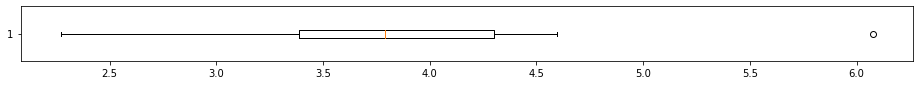

In [72]:
predicted = []
for i in range(len(l)):
    predicted.append(l[i])
predicted = np.array(predicted)

error = abs(test - predicted)

print('MSE ', error.mean())

plt.figure(figsize=(16, 1))
plt.boxplot(error, vert = False);
plt.show()

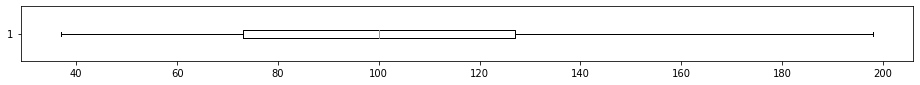

In [73]:
plt.figure(figsize=(16, 1))
plt.boxplot(data4deco['y'], vert = False);
plt.show()

[[ 1  1  9  6  4 10]
 [ 1  9  6  4 10  0]
 [ 9  6  4 10  0  0]
 [ 6  4 10  0  0  9]
 [ 4 10  0  0  9  1]
 [10  0  0  9  1  4]
 [ 0  0  9  1  4  2]
 [ 0  9  1  4  2  2]
 [ 9  1  4  2  2  6]
 [ 1  4  2  2  6  4]
 [ 4  2  2  6  4  5]
 [ 2  2  6  4  5 10]
 [ 2  6  4  5 10  2]
 [ 6  4  5 10  2 10]
 [ 4  5 10  2 10 10]]


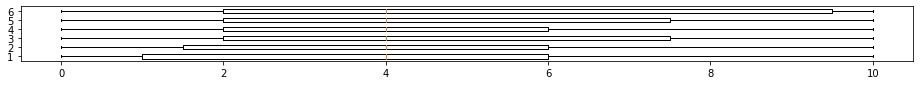

In [92]:
l1 = [1, 2, 13, 4, 5, 16, 7, 8, 19, 11, 17, 13, 20, 23, 45, 60, 70, 75, 85, 90]
l2 = [2, 3,  4, 10, 9, 6, 7, 8, 10, 12, 13, 15, 22, 29, 49, 55, 80, 73, 95, 100]

step_size = 6
error_set = np.array([])
expected = []
predicted = []
for i in range(len(l1)):
    s1 = l1[i:i+step_size]
    s2 = l2[i:i+step_size]
    expected.append(s1)
    predicted.append(s2)
    if i+step_size >= len(l1): break

expected = np.array(expected)
predicted = np.array(predicted)

error_set = abs(expected - predicted)         
print(error_set)        
plt.figure(figsize=(16, 1))
plt.boxplot(error_set, vert = False);
plt.show()

In [74]:
l2 = [2, 3, 4, 5, 5, 6, 7, 8, 10, 12, 13, 15]
l2[0:3]

[2, 3, 4]